In [55]:
from standardInclude import *

In [56]:
fString = "./filterWheel_GainCalibration/minusPoint2_Calo3.root"
f = r.TFile(fString)
calo = 3
f.cd("islandFits"+str(calo)+"/splines")
#f.ls()

t = f.Get("islandFits"+str(calo)).Get("fits").Get("fitTree")

In [57]:
#calo = 3
xtal = 13
#fillNum = 6

#create the string to cut on 
cutString = ("caloNum == "+str(calo)
              +" && xtalNum == "+str(xtal)
              #+" && fillNum == "+str(fillNum)
              #+" && chi2 < 100"
            )

[2.0, 2.0, 4.0, 4.0, 6.0, 6.0, 8.0, 8.0, 10.0, 10.0, 12.0, 12.0, 14.0, 14.0, 16.0, 16.0, 18.0, 18.0, 20.0, 20.0, 22.0, 22.0, 24.0, 24.0, 26.0, 26.0, 28.0, 28.0, 30.0, 30.0, 34.0, 34.0, 36.0, 36.0, 38.0, 38.0, 40.0, 40.0, 42.0, 42.0, 44.0, 44.0, 46.0, 46.0, 48.0, 48.0, 50.0, 50.0, 52.0, 52.0, 54.0, 54.0, 56.0, 56.0, 58.0, 58.0, 60.0, 60.0, 62.0, 62.0, 64.0, 64.0, 68.0, 68.0, 70.0, 70.0, 72.0, 72.0, 74.0, 74.0, 76.0, 76.0, 78.0, 78.0, 80.0, 80.0, 82.0, 82.0, 84.0, 84.0, 86.0, 86.0, 88.0, 88.0, 90.0, 90.0, 92.0, 92.0, 94.0, 94.0, 96.0, 96.0, 98.0, 98.0, 102.0, 102.0, 104.0, 104.0, 106.0, 106.0, 108.0, 108.0, 110.0, 110.0, 112.0, 112.0, 114.0, 114.0, 116.0, 116.0, 118.0, 118.0, 120.0, 120.0, 122.0, 122.0, 124.0, 124.0, 126.0, 126.0, 128.0, 128.0, 130.0, 130.0, 132.0, 132.0, 136.0, 136.0, 138.0, 138.0, 140.0, 140.0, 142.0, 142.0, 144.0, 144.0, 146.0, 146.0, 148.0, 148.0, 150.0, 150.0, 152.0, 152.0, 154.0, 154.0, 156.0, 156.0, 158.0, 158.0, 160.0, 160.0, 162.0, 162.0, 164.0, 164.0, 166.0, 16

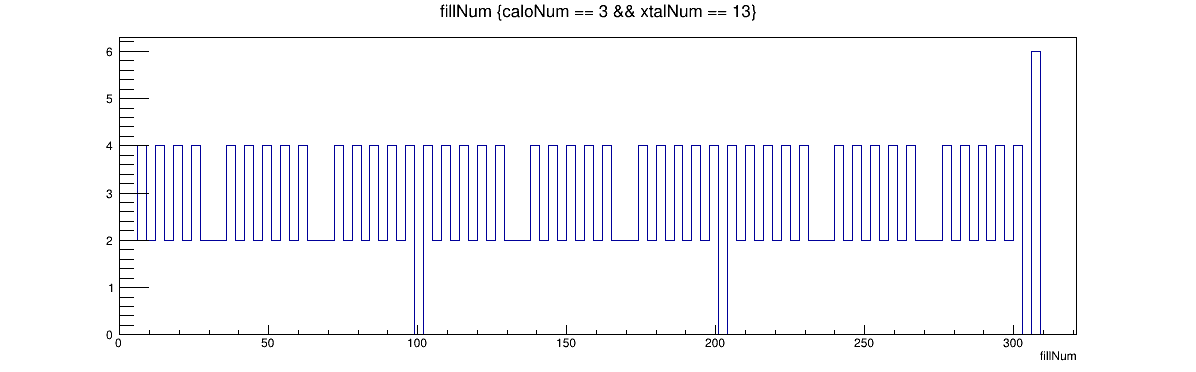

In [58]:
c = r.TCanvas("c","c",1200,400)
ding = t.Draw("fillNum",cutString,"colz")
print([t.GetV1()[i] for i in range(ding)])
c.Draw()

In [59]:
fillNum = 2
cutString += " && fillNum == "+str(fillNum)

In [60]:
print(cutString)

caloNum == 3 && xtalNum == 13 && fillNum == 2


In [61]:
numberOfIslands = t.Draw("islandNums", cutString,"goff")
#get islandNums
islandNums = [int(t.GetV1()[x]) for x in range(numberOfIslands)]
print(numberOfIslands, islandNums)

2 [0, 1]


In [62]:
t.Draw("subRunNum",cutString,"goff")
subrun = int(t.GetV1()[0])
print("Subrun", subrun)
n_entries = t.BuildIndex('fillNum*(subRunNum=={})'.format(subrun),
                         'islandNums[0]*(xtalNum == 0 && subRunNum == {}) - 1*(xtalNum!=0)'.format(subrun))

Subrun 5


In [63]:
entries = []
print(islandNums)
for island in islandNums:
    entry_num = t.GetEntryNumberWithIndex(fillNum, island) 
    print(island, entry_num)
    if(entry_num > -0.01):
        entries.append(entry_num + xtal)
print(entries)

[0, 1]
0 0
1 54
[13, 67]


In [64]:
islandLengths = []
energies = []
pedestals = []
islandNums = []
chiSquare = []
statuses = []
laserHits = []
times = []
firstSamples = []
traces = []
graphs = []

for entry in entries:
    t.GetEntry(entry)

    islandLengths.append(t.islandLengths[0])
    energies.append([x for x in t.energies])
    pedestals.append(t.pedestal)
    islandNums.append(t.islandNums[0])
    chiSquare.append(t.chi2)
    statuses.append([x for x in t.statuses])
    laserHits.append([x for x in t.laserHits])
    times.append([x for x in t.times])
    firstSamples.append(t.firstSampleNums[0])
    traces.append( [x for x in t.trace] )

for i, trace in enumerate(traces):
    gri = r.TGraph()
    for j, ti in enumerate(trace):
        gri.SetPoint(j, j, ti)
    gri.SetMarkerSize(0.6)
    gri.SetMarkerStyle(8)
    gri.SetTitle("Trace: Calo "+str(calo)+", Xtal "+str(xtal)+" in Fill "+str(fillNum)+", Island "+str(islandNums[i])
                 +"; Sample Number; Amplitude [ADC Units]")
    graphs.append(gri)
#print(graphs)
    

In [65]:
print(islandLengths)
print(energies)
print(pedestals)
print(islandNums)
print(chiSquare)
print(statuses)
print(laserHits)
print(times)
print(firstSamples)
print(graphs)

[64, 64]
[[8692.668584551866], [9214.236203555995]]
[-1762.8443277571687, -1764.7819217886781]
[0, 1]
[92.0843954259354, 330.6388088026296]
[[1], [1]]
[[1], [1]]
[[5560.356555632169], [735968.345844793]]
[5549, 735957]
[<ROOT.TGraph object at 0x7fffe1d37610>, <ROOT.TGraph object at 0x7fffe25ef8e0>]


In [66]:
spline = f.Get("islandFits"+str(calo)+"").Get("splines").Get("laser"+str(xtal))
beamspline = f.Get("islandFits"+str(calo)+"").Get("splines").Get("beam"+str(xtal))
print(spline)

<ROOT.TSpline3 object ("laser13") at 0x7fffe1f4c710>


In [67]:
print(times)
print(firstSamples)

[[5560.356555632169], [735968.345844793]]
[5549, 735957]


In [68]:
whichGraph = 0
splineGraphs = []
for whichGraph in range(len(traces)):

    splineGraphsi = []
    allSplineScaled = []
    
    for fiti in range(len(times[whichGraph])):
        splineScaled = []
        offset = times[whichGraph][fiti] - firstSamples[whichGraph]
        print(offset)
        for i in range(len(traces[whichGraph])):
            splineScaled.append( spline.Eval(i - offset)*energies[whichGraph][fiti] + pedestals[whichGraph] )
        #print(splineScaled)
        allSplineScaled.append(splineScaled)

        splineGraph = r.TGraph()
        for i, si in enumerate(splineScaled):
            splineGraph.SetPoint(i, i, si)
        splineGraph.SetLineColor(fiti+2)
        splineGraphsi.append(splineGraph)
        
    if( len(times[whichGraph]) > 1):
        splineGraph = r.TGraph()
        totalSpline = [pedestals[whichGraph] for x in range(len(allSplineScaled[0]))]
        for i, si in enumerate(allSplineScaled):
            for ii, sii in enumerate(si):
                totalSpline[ii] += sii - pedestals[whichGraph]
                
        for i, si in enumerate(totalSpline):
            splineGraph.SetPoint(i, i, si )
            
        splineGraph.SetLineColor(9)
        splineGraphsi.append(splineGraph)
    
    splineGraphs.append(splineGraphsi)

11.356555632169147
11.345844793017022


In [69]:
print(splineGraphs)

[[<ROOT.TGraph object at 0x7fffe1d43c90>], [<ROOT.TGraph object at 0x7fffe2747930>]]


In [70]:
print(pedestals)
print(energies)

[-1762.8443277571687, -1764.7819217886781]
[[8692.668584551866], [9214.236203555995]]


In [71]:
textBoxes = []
for i in range(len(traces)):
    pt = r.TPaveText(0.45,0.45,0.87,0.87,"ndc");
    for j in range(len(energies[i])):
        pt.AddText("E_{0} = "+str(round(energies[i][j],2)))
        pt.AddText("t_{0} = "+str(round(times[i][j],2)))
        pt.AddText("Pedestal = "+str(pedestals[i]))
        pt.AddText("Status = "+str(statuses[i]))
        pt.AddText("Laser Hit = "+str(laserHits[i][j]))
        pt.AddText("#chi^{2} = "+str(round(chiSquare[i],2)))
        pt.AddText(" ")
        pt.AddLine()
    
    textBoxes.append(pt)
print(textBoxes)

[<ROOT.TPaveText object ("TPave") at 0x7fffe26a6bc0>, <ROOT.TPaveText object ("TPave") at 0x7fffe2629580>]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


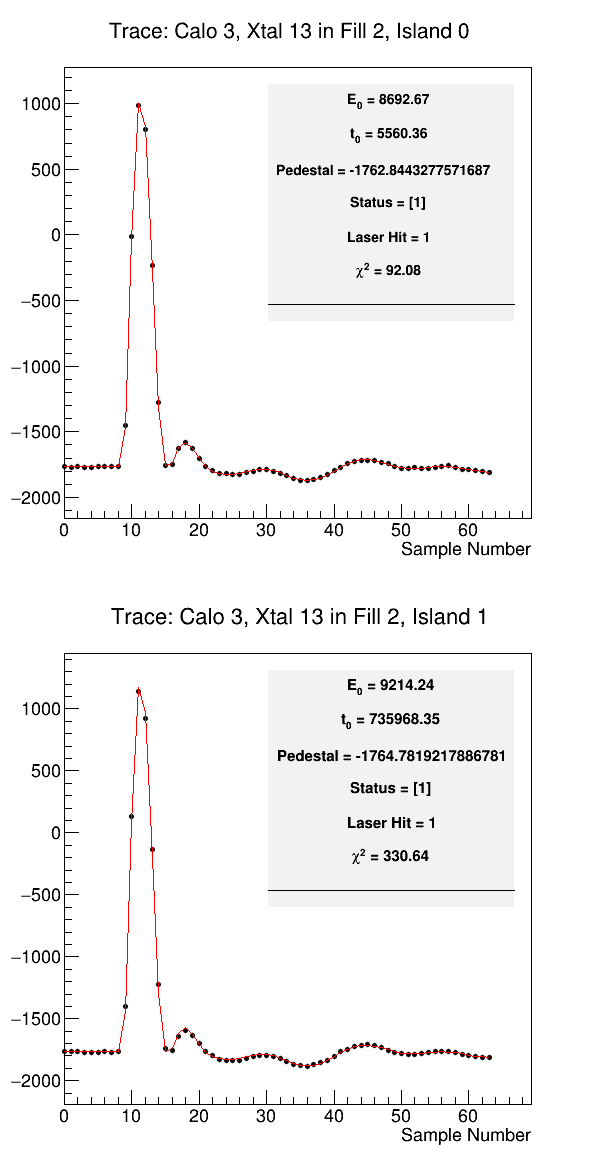

In [72]:
c = r.TCanvas("c","c", int(np.ceil((len(traces)/2)))*600, 2*600)
c.Divide(int(np.ceil((len(traces)/2))), 2)
for i in range(len(traces)):
    c.cd(i+1)
    graphs[i].Draw("ap")
    for si in splineGraphs[i]:
        si.Draw("l same")
    textBoxes[i].Draw("SAME")

c.Draw()

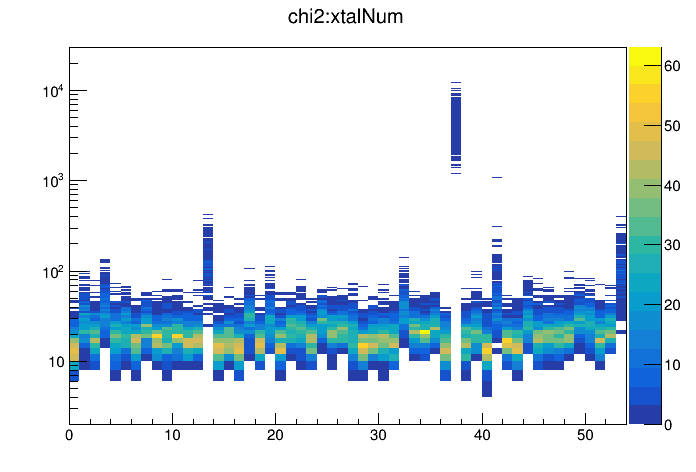

In [73]:
c = r.TCanvas()
t.Draw("chi2:xtalNum>>hist(54,0,54,15000,0,30000)","","colz")
c.SetLogy()
c.Draw()